In [ ]:
import torch
import numpy as np

In [ ]:
x = torch.empty(2, 2)
x

tensor([[5.6401e-35, 0.0000e+00],
        [3.3631e-44, 0.0000e+00]])

In [ ]:
x = torch.rand(2, 2)
x

tensor([[0.3150, 0.3541],
        [0.1555, 0.4938]])

In [ ]:
y = torch.rand(2, 2)
y

tensor([[0.1606, 0.5022],
        [0.7094, 0.5869]])

In [ ]:
z = torch.sub(x, y)
z

tensor([[ 0.1543, -0.1481],
        [-0.5538, -0.0931]])

In [ ]:
x[1, 1].item()

0.4938317537307739

In [ ]:
a = torch.ones(2, 2)
b = a.numpy
a, b

(tensor([[1., 1.],
         [1., 1.]]), <function Tensor.numpy>)

In [ ]:
a.add_(1)
a, b

(tensor([[2., 2.],
         [2., 2.]]), <function Tensor.numpy>)

In [ ]:
a = np.ones(5)
b = torch.from_numpy(a)
a, b

(array([1., 1., 1., 1., 1.]),
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64))

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  x = torch.ones(5, device=device)
  y = torch.ones(5)
  y = y.to(device)
  z = x + y
  z = z.to("cpu") # gpu tensor is not avalable to convert to numpy
  z.numpy()

In [ ]:
x = torch.ones(5, requires_grad=True)
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [ ]:
x = torch.randn(3)
y = torch.randn(3, requires_grad=True)
x, y

(tensor([-0.3565,  2.9881, -1.2672]),
 tensor([-0.7507,  0.5776,  0.7011], requires_grad=True))

In [ ]:
x = torch.ones(3, requires_grad=True)
print(x)

y = x + 2
print(y)

z = y * y * 2
print(z)
z = z.mean()
print(z)

z.backward()
print(x.grad)

tensor([1., 1., 1.], requires_grad=True)
tensor([3., 3., 3.], grad_fn=<AddBackward0>)
tensor([18., 18., 18.], grad_fn=<MulBackward0>)
tensor(18., grad_fn=<MeanBackward0>)
tensor([4., 4., 4.])


In [ ]:
weight = torch.ones(4, requires_grad=True)

for epoch in range(4 ):
  model_output = (weight * 3).sum()
  model_output.backward()

  print(weight.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])


In [ ]:
weight = torch.ones(4, requires_grad=True)

for epoch in range(4 ):
  model_output = (weight * 3).sum()
  model_output.backward()

  print(weight.grad)

  weight.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


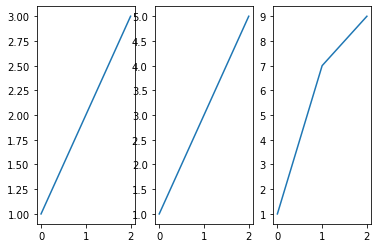

In [ ]:
import matplotlib.pyplot as plt

base = [0, 1, 2] # x data

a = [1, 2, 3] # y data1
b = [1, 3, 5] # y data2
c = [1, 7, 9] # y data3

data = [a, b, c] # full data

fir, ax = plt.subplots(1,3)
for i in range(3):
  ax[i].plot(base, data[i])
plt.show()

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

y_hat = w * x
loss = (y_hat - y)**2

print(loss)

loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [ ]:
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

def foward(x):
  return w * x

def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred - y).mean()

print(f"Prediction before training: f(5) = {foward(5):.3f}")

learning_rate = 0.01
n_iters = 15

for epoch in range(n_iters):
  y_pred = foward(x)

  l = loss(y, y_pred)

  dw = gradient(x, y, y_pred)

  w -= learning_rate * dw

  if epoch % 1 == 0:
    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {foward(5):.3f}")


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [ ]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def foward(x):
  return w * x

def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

print(f"Prediction before training: f(5) = {foward(5):.3f}")

learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  y_pred = foward(x)

  l = loss(y, y_pred)

  l.backward()
  
  with torch.no_grad():
    w -= learning_rate * w.grad

  w.grad.zero_()

  if epoch % 10 == 0:
    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {foward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [ ]:
import torch.nn as nn

x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)


x_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = x.shape

input_size = output_size = n_features
model = nn.Linear(input_size, output_size)

print(f"Prediction before training: f(5) = {model(x_test).item():.3f}")

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  y_pred = model(x)

  l = loss(y, y_pred)

  l.backward()

  optimizer.step()

  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {model(x_test).item():.3f}")

Prediction before training: f(5) = 2.430
epoch 1: w = 0.656, loss = 16.42758560
epoch 11: w = 1.589, loss = 0.50213504
epoch 21: w = 1.745, loss = 0.08561734
epoch 31: w = 1.775, loss = 0.07061384
epoch 41: w = 1.786, loss = 0.06624455
epoch 51: w = 1.793, loss = 0.06238208
epoch 61: w = 1.799, loss = 0.05875091
epoch 71: w = 1.805, loss = 0.05533135
epoch 81: w = 1.811, loss = 0.05211078
epoch 91: w = 1.816, loss = 0.04907759
Prediction after training: f(5) = 9.631


In [ ]:
import torch.nn as nn

x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)


x_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = x.shape

input_size = output_size = n_features

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)
  
model = LinearRegression(input_size, output_size)

print(f"Prediction before training: f(5) = {model(x_test).item():.3f}")

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  y_pred = model(x)

  l = loss(y, y_pred)

  l.backward()

  optimizer.step()

  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {model(x_test).item():.3f}")

Prediction before training: f(5) = 3.976
epoch 1: w = 0.762, loss = 8.82242393
epoch 11: w = 1.444, loss = 0.48678708
epoch 21: w = 1.564, loss = 0.25607628
epoch 31: w = 1.594, loss = 0.23593542
epoch 41: w = 1.608, loss = 0.22206730
epoch 51: w = 1.620, loss = 0.20913833
epoch 61: w = 1.632, loss = 0.19696522
epoch 71: w = 1.643, loss = 0.18550083
epoch 81: w = 1.653, loss = 0.17470378
epoch 91: w = 1.663, loss = 0.16453518
Prediction after training: f(5) = 9.325


10 4328.21923828125
20 3229.456787109375
30 2434.76904296875
40 1859.3753662109375
50 1442.3380126953125
60 1139.79052734375
70 920.111083984375
80 760.474609375
90 644.384521484375
100 559.904296875


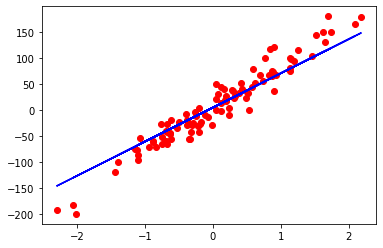

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x_numpy, y_numpy = datasets.make_regression(n_samples=100,
                                            n_features=1,
                                            noise=20,
                                            random_state=1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape

model = nn.Linear(n_features, 1)

creterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
  y_pred = model(x)
  loss = creterion(y_pred, y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(epoch+1, loss.item())

predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

bc = datasets.load_breast_cancer()

X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

class LogisticRegression(nn.Module):

  def __init__(self, n_input_feature):
    super(LogisticRegression, self).__init__()

    self.linear = nn.Linear(n_input_feature, 1)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = LogisticRegression(n_features)

creterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
  y_pred = model(X_train)
  loss = creterion(y_pred, y_train)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(epoch+1, loss.item())

10 0.50931715965271
20 0.4339000880718231
30 0.3834504187107086
40 0.34690946340560913
50 0.31893348693847656
60 0.2966509759426117
70 0.2783745527267456
80 0.26304152607917786
90 0.24994587898254395
100 0.2385978102684021


In [ ]:
with torch.no_grad():
  y_pred = model(X_test)
  y_pred_cls = y_pred.round()
  acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(acc)

tensor(0.8860)


In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self):
    xy = np.loadxtx("path", 
                    delimiter=",", 
                    dtype=np.float32,
                    skiprows=1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]])
    self.n_samples = xy.shape[0]

  def __getiten__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

dataset = WineDataset()
dataloader = DataLoader(dataset=dataset,
                        batch_size=4,
                        shuffle=True,
                        num_workers=2)
dataiter = iter(dataloader)
data = dataiter.next()
features, label = data

num_epochs = 2
total_samples = len(dataset)
n_iteations = math.ceil(total_samples / 4)

for epoch in range(num_epochs):
  for i, (input, labels) in enumerate(dataloader):
    if (i + 1) % 5 == 0:
      print(epoch+1,i+1,input.shape[0])

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

loss = nn.CrossEntropyLoss()
Y = torch.tensor([0])
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.1, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

0.4170299470424652
2.186870813369751


In [ ]:
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

predictions1, predictions2

(tensor([0]), tensor([1]))

In [ ]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([2, 0, 1])
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.3], [0.1, 1.0, 2.3], [0.1, 3.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

predictions1, predictions2

0.3018244206905365
1.6146860122680664


(tensor([2, 0, 1]), tensor([0, 2, 1]))

In [7]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
import sys

writer = SummaryWriter('')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(root="",train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root="",train=False,
                                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


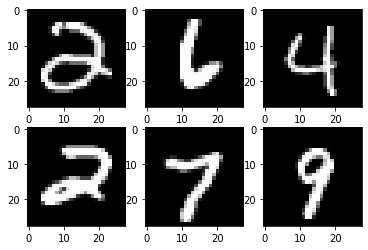

In [10]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
  # plt.show()

img_grid = torchvision.utils.make_grid(samples)
writer.add_image("mnist", img_grid)
writer.close()
# sys.exit()

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()

    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)

    return out

model = NeuralNet(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(9), lr=learning_rate)

writer.add_graph(model, samples.reshape(-1, 28*28))
writer.close()

n_total_steps = len(train_loader)

running_loss = 0.0
running_correct_pred = 0.0
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    _, predicted = torch.max(outputs.data, 1)
    running_correct_pred += (predicted == labels).sum()

    if (i + 1) % 100 == 0:
      print(epoch + 1, i + 1, loss.item())
      writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps * i)
      writer.add_scalar('training acc', running_correct_pred / 100, epoch * n_total_steps * i)
      running_loss = 0.0
      running_correct_pred = 0.0

labels = []
preds = []
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, prediction = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct = (prediction == labels).sum().item()

    class_predictions = [F.softmax(output, dim=0) for output in outputs]
    preds.append(class_predictions)
    labels.append(prediction)
  
  preds = torch.cat([torch.stack(batch) for batch in preds])
  labels = torch.cat(labels)
  
  acc = 100 * n_correct / n_samples
  print(acc)

  classes = range(10)
  for i in classes:
    labels_i = labels == i
    preds_i = preds[:, i]
    writer.add_pr_curve(str(i), labels_i, preds_i, global_stp=0)
    writer.close

1 100 0.3598698377609253
1 200 0.3118612766265869
1 300 0.2637869119644165
1 400 0.33489975333213806
1 500 0.22093959152698517
1 600 0.228474423289299
2 100 0.287611722946167
2 200 0.2416609823703766
2 300 0.29913073778152466
2 400 0.11979933828115463
2 500 0.19672782719135284
2 600 0.20824602246284485
0.97
